In [13]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_data = pd.read_csv("data/clinicaltrial_data.csv")
drug_data = pd.read_csv("data/mouse_drug_data.csv")

# Combine the data into a single dataset

drug_trial_data = trial_data.merge(drug_data, on = 'Mouse ID', how = 'outer')


# Display the data table for preview

drug_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [21]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_response_df = drug_trial_data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]



# Convert to DataFrame

tumor_response_df = pd.DataFrame(tumor_response_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())

# Preview DataFrame

tumor_response_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [22]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_df["Volume SEM"] = tumor_response_df['Tumor Volume (mm3)'].sem()


# Preview DataFrame
tumor_response_df.head()


Tumor Volume (mm3)  Volume SEM
Drug      Timepoint                                
Capomulin 0                   45.000000    0.898067
          5                   44.266086    0.898067
          10                  43.084291    0.898067
          15                  42.064317    0.898067
          20                  40.716325    0.898067

In [24]:
# Minor Data Munging to Re-Format the Data Frames

tumor_response_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
tumor_response_sem_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Volume SEM')  


# Preview that Reformatting worked
print(tumor_response_pivot.head())
print(tumor_response_sem_pivot.head())

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
Drug       Capomulin  Ceftamin  Infubinol  Ketapril  N

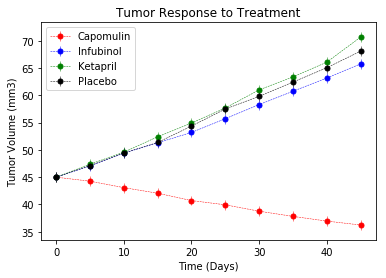

In [39]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Capomulin'], yerr=tumor_response_sem_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Infubinol'], yerr=tumor_response_sem_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Ketapril'], yerr=tumor_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Placebo'], yerr=tumor_response_sem_pivot['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(tumor_response_pivot.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc='upper left')

plt.show()

# Save the Figure

plt.savefig('tumor_response_to_tx.png')

## Metastatic Response to Treatment

In [29]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_df = drug_trial_data[['Drug', 'Timepoint', 'Metastatic Sites']]

metastatic_response_df = pd.DataFrame(metastatic_response_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())

# Calculate standard error for Metastatic Sites
metastatic_response_df["Metastatic Site SEM"] = metastatic_response_df['Metastatic Sites'].sem()
metastatic_response_df.reset_index(inplace = True)

# Preview DataFrame
metastatic_response_df.head()



,Drug,Timepoint,Metastatic Sites,Metastatic Site SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [33]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metastatic_response_sem_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Site SEM')  

print(metastatic_response_pivot.head())
print(metastatic_response_sem_pivot.head())


Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118  
Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                   

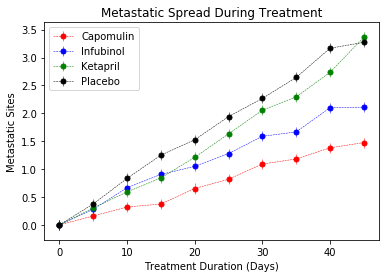

In [38]:
# Generate the Plot (with Error Bars)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Capomulin'], yerr=metastatic_response_sem_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Infubinol'], yerr=metastatic_response_sem_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Ketapril'], yerr=metastatic_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Placebo'], yerr=metastatic_response_sem_pivot['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc='upper left')
plt.show()

# Save the Figure

plt.savefig('metastatic_spread_during_tx.png')


## Survival Rates

In [42]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate_df = drug_trial_data[['Drug', 'Timepoint', 'Mouse ID']]

# Set index to Drug and Timepoint
survival_rate_df = survival_rate_df.set_index(['Drug', 'Timepoint'])
survival_rate_df.head()

Mouse ID
Drug      Timepoint         
Capomulin 0             b128
          5             b128
          10            b128
          15            b128
          20            b128

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [45]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_df['Mouse Count'] = survival_rate_df.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Reshaping the data frame using Pivot Table
survival_rate_pivot = survival_rate_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  


# Preview the Data Frame
survival_rate_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


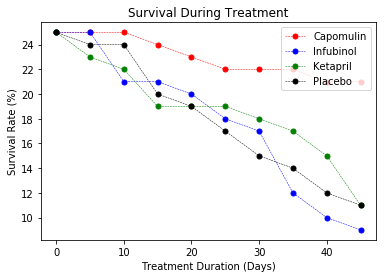

In [46]:
# Generate the Plot (Accounting for percentages)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Infubinol'], 
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Ketapril'], 
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Placebo'], 
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Survival Rate (%)")
# legend 
plt.legend(loc='upper right')
plt.show()

# Save the Figure
plt.savefig('survival_during_tx.png')


## Summary Bar Graph

In [68]:
# Calculate the percent changes for each drug

percentage_change =  ((tumor_response_pivot.iloc[-1]-tumor_response_pivot.iloc[0])/tumor_response_pivot.iloc[0]) * 100


# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

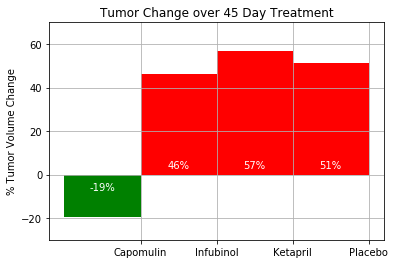

In [72]:
passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig('tumor_change_over_45day_treatment.png')